<a href="https://colab.research.google.com/github/NancyEspinosaj/DataScienceAssentment/blob/main/data_scientist_Assentment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ASSESSMENT CARGOS ANALÍTICOS**

##ANÁLISIS CLUSTER

###a.	Explique el procedimiento subyacente en la elaboración del gráfico.


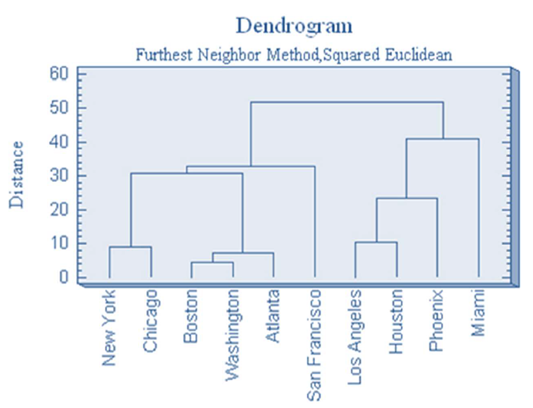

En primer lugar, es de considerada que el análisis de clúster que se encuentra detrás de la representación grafica mostrada, tiene como principal propósito agrupar objetos basados en las características que poseen. Estas características son el conjunto de variables que representa las características para comparar objetos en dicho análisis. 

Primero se debe obtener la matriz de datos y dependiendo del tipo de dato trabajado se le asignara una transformación en caso de ser necesario (en especial para datos categóricos). El segundo paso corresponde a la obtención de una matriz de distancia/similitud. Y oír ultimo la aplicación del método de agrupamiento.

En cuanto a este último como lo muestra la gráfica, corresponde a *Furthest Neighbor Method* corresponde aun método de agrupamiento jerárquico aglomerativo, al inicio cada elemento está en un grupo propi, luego se combina secuencialmente en grupos más grandes hasta que todos los elementos terminan en el mismo grupo. En cada paso se combinan los dos grupos separados por la distancia más corta (Squeared Euclidean). matemáticamente la función se describe mediante la expresión

$D(X,Y) = \max_{( x \in X,y \in Y)} d^2(x,y)$

Siendo $d^2(x,y)$ la distancia Euclidiana de los elementos. Además X y Y  son el conjunto de elementos. 

Iterativamente se cada vez que se realiza una agrupación se construye una nueva matriz de distancias que permite construir el dendograma final como se muestra en la imagen.


###b.	Proponga cuales serían los clúster, resalte los puntos de corte e interprete. Justifique su respuesta

Partiendo de la idea que al  inicio cada elemento esta en un grupo propio, y apartir de la determinacion aproximada de distancias se pueden identificar 9 clusters. Que se encuentran descritos en la siguiente tabla. 

| Numero de Cluster| Distancia Aprox | Ciudad|
| ----- | --- | ----- |
| Cluster 1 | 5 | Boston & Washington |
| Cluster 2 | 7 | Atlanta & Cluster 1 |
| Cluster 3 | 9 | New York & Chicago |
| Cluster 4 | 10 | Los angeles & Houston |
| Cluster 5 | 22 | Phoenix & Cluster 4 |
| Cluster 6 | 30 | Cluster 3 & Cluster 2 |
| Cluster 7 | 32 | Cluster 6 & San Francisco |
| Cluster 8 | 42 | Cluster 5 & Miami |
| Cluster 9 | 52 | Cluster 7 & Cluster 8 |

Cada una de las líneas ilustra la distancia la distancia de cada par de elementos de nuestro árbol. De este se puede deducir que el muestreo se realizado a la(s) variable(s) de estudio muestra alguna diferencia significativa entre el cluster 8 y el cluster 9. Este tipo de grafica puede mostrar la relación entre variables y la relación fuerte o débil de las mismas.

### c.	Brevemente mencione las ventajas y desventajas de la metodología utilizada en el procedimiento.

* Ventajas:
  * *Algoritmo Simple:* En su comprensión, explicación e interpretación.
  * *Alta Precisión*: Alta pero no competitiva frente a modelos de aprendizaje mejor supervisados.
  * *Insensible a los valores atípicos*: La precisión puede verse afectada por el ruido o las características irrelevantes.

* Desventajas:
  * *Computacionalmente costoso*: El algoritmo almacena todos los datos.
  * *Requisito de memoria alta*: Almacena todos (o casi todos) los datos iteración a iteración.

## DISTRIBUCIÓN NORMAL

### Aleatoriamente el score sigue una distribución normal. Suponga que, analizando los datos, los valores de 650 y 750 se encuentran en el percentil 60 y 80 de la distribución respectivamente. En medio del análisis su jefe le pregunta que es mayor entre: un puntaje de 700 o el valor en el percentil 70 de la distribución. ¿es posible responder a la pregunta de su jefe? Explique y argumente su respuesta.

Es posible, asumiendo algunas cosa como que la distribución es una normal con parámetros N(0,1). En este caso se puede calcular como se muestra en la siguiente imagen, y mediante la solución de un sistema de ecuaciones hallar la media y la desviación estándar de este caso para así poder hallar la probabilidad de las dos comparaciones hechas en el inicio de la pregunta. 

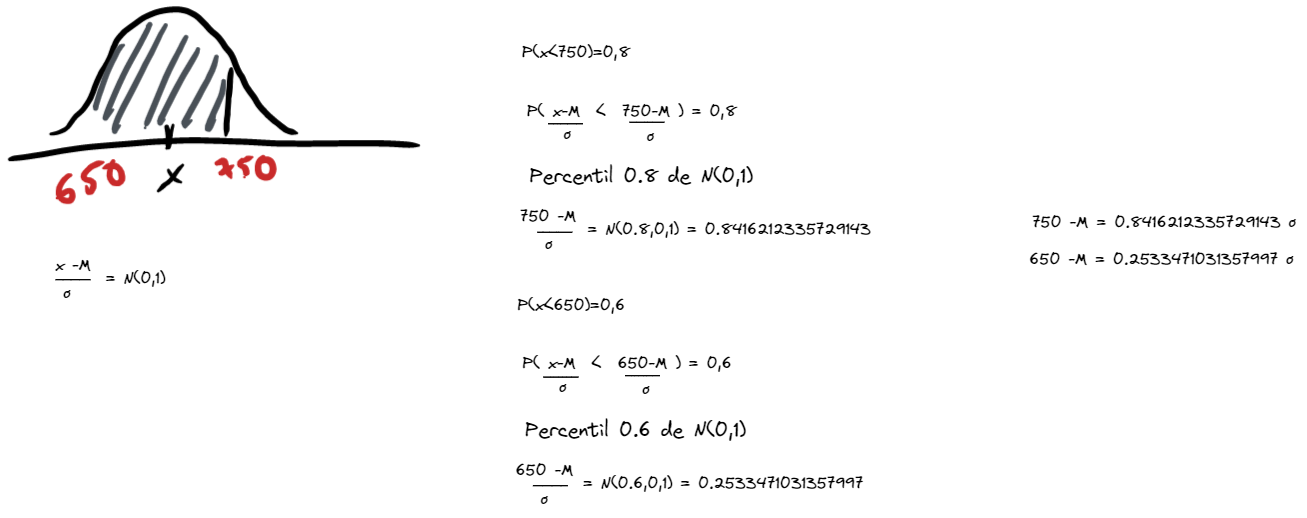
Dando como resultado que es mayor la probabilidad de un puntaje de 700. 

In [ ]:
import scipy.stats
import numpy as np

#Hallar los valores para cada percentil
percentil_80 = scipy.stats.norm.ppf(0.8)
print(percentil_80)
percentil_60 = scipy.stats.norm.ppf(0.6)
print(percentil_60)

#Calculra la media y la desviacion con un sistema de ecuaciones
A = np.array([[1, percentil_80], [1, percentil_60]])
B = np.array([750, 650])
X = np.linalg.solve(A,B)

print(X)

#Probar los resultados 
norm = scipy.stats.norm(X[0],X[1]).cdf(750)
print(norm)

#Respuesta
caseOne = scipy.stats.norm(X[0],X[1]).cdf(700)
caseTwo = scipy.stats.norm.ppf(0.7)

if caseOne > caseTwo:
  print("El mayor caso es el Puntaje de 700 con una probabilidad de: " + str(caseOne))
else:
  print("El mayor caso es el percentil 70 con una probabilidad de: " + str(caseTwo))




0.8416212335729143
0.2533471031357997
[606.93383577 169.98877704]
0.8
El mayor caso es el Puntaje de 700 con una probabilidad de: 0.7079769279204344


##CASO DE CONSULTORIA


Nuestro cliente TELCO, tiene consumidores (que tienen un contrato y pagan una mensualidad) que describen un ciclo de vida que comienza con la adquisición, posteriormente el cliente puede cambiar el número de decodificadores, su tecnología, adquirir productos Premium u optimizar su plan de acuerdo a sus preferencias. El consumidor también puede cancelar la suscripción y dejar voluntariamente a nuestro cliente, este evento de cancelación se llama “CHURN”, y este tipo de churn específicamente se conoce como “CHURN VOLUNTARIO”.

Adjunto encontrará el ejemplo de una base de datos con las siguientes variables:
1.	ID.
2.	Estado Cliente al final del periodo: Estado en el que terminó el cliente al final de Marzo 2017 
a.	A – Activo
b.	D – Desconectado
c.	C – Cancelado
3.	Churn Total: Si el cliente fue CHURN al final de Marzo 2017.
4.	Score A.
5.	Score B.
Las demás variables son variables adicionales de negocio.


In [27]:
# ========== Librerias ===============================
import numpy as np
import pandas as pd
from sklearn import preprocessing
from numpy.core.numeric import NaN
!pip install fitter
from fitter import Fitter

import matplotlib.pyplot as plt
% matplotlib inline
from matplotlib import style
import seaborn as sns
# ========== permite subir archivos desde google ===============================
from google.colab import drive
drive.mount('/content/drive')

#=================== ingresar la ruta de archivo CSV ==========================
data = pd.read_excel('/content/drive/MyDrive/Prueba tecnica/base de datos data scien _Assesment_Cargo_Analitico_V01.xlsx')
df = pd.DataFrame(data)
df

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,Estado Cliente al final del periodo,Churn Total,Score A,Score B,Tipo Vivienda,Zona Instalacion,Distrito,Estrato Declarado,Tipo Factura,Producto,Premium Movie,Premium OBH,Premium Adultos,Tecnologia,Catidad Decodificadores,Decodificadores Regular,Decodificadores DVR,Decodificadores HD,"Decodificadores ""HD ONLY""",Metodo de Pago Estandarizado,Antigüedad,Canal Estandarizado,Score Aprobación,Tecnología GO,Revista TELCO,Cantidad Decodificadores Total,Tipo Suscripcion,Campaña de Cobranza Actual
0,421541,A - Activo,0,NaN,19.0,D - Normal Edificio,URBANO,ORIENTE,3.0,Electronic,SILVER FULL,1,1,0,HD_ONLY,2.0,0.0,0.0,0.0,2.0,DA - TC,1.0,NaN,552.0,0,0,NaN,Cross Selling,DX35_riesgo_medio_y_bajo
1,544025,A - Activo,0,NaN,NaN,N- Normal Casa,URBANO,NGOLDCCIDENTE,1.0,Printed,SILVER FULL,1,0,0,HD,2.0,1.0,0.0,1.0,0.0,DA - Ahorros o Cte,1.0,Dealer,448.0,0,0,NaN,Bundle,NaN
2,562872,A - Activo,0,NaN,21.0,N- Normal Casa,URBANO,OCCIDENTE,3.0,Printed,GOLD FULL,0,0,0,HD_ONLY,2.0,0.0,0.0,0.0,2.0,DA - Ahorros o Cte,1.0,Directo,1.0,0,0,NaN,Bundle,DX35_riesgo_medio_y_bajo
3,562930,A - Activo,0,NaN,NaN,D - Normal Edificio,URBANO,BOGOTA,3.0,Printed,GOLD FULL,0,0,0,HD_ONLY,2.0,0.0,0.0,0.0,2.0,DA - TC,1.0,Dealer,780.0,0,0,NaN,Only TV,NaN
4,565269,A - Activo,0,NaN,NaN,D - Normal Edificio,URBANO,BOGOTA,6.0,Printed,GOLD FULL,0,0,0,HD_ONLY,2.0,0.0,0.0,0.0,2.0,DA - TC,1.0,Dealer,0.0,0,0,NaN,Only TV,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,491544,A - Activo,0,0.000536,11.0,N- Normal Casa,URBANO,OCCIDENTE,2.0,Printed,GOLD MAX,0,0,0,HD,5.0,0.0,0.0,1.0,4.0,DA - TC,8.0,Televentas (TP),629.0,0,0,NaN,Only TV,DX35_riesgo_medio_y_bajo
9996,4502,A - Activo,0,0.000531,24.0,N- Normal Casa,URBANO,OCCIDENTE,NaN,Electronic,GOLD MAX,1,1,0,HD,5.0,3.0,0.0,1.0,1.0,INVOICE,NaN,Dealer,NaN,0,0,5.0,Only TV,DX35_riesgo_medio_y_bajo
9997,484915,A - Activo,0,0.000522,20.0,N- Normal Casa,URBANO,CENTRO,4.0,Printed,GOLD MAX,1,1,0,HD,5.0,0.0,0.0,1.0,4.0,DA - TC,9.0,Dealer,751.0,0,0,NaN,Only TV,DX35_riesgo_medio_y_bajo
9998,460914,A - Activo,0,0.000522,12.0,N- Normal Casa,URBANO,NORTE,2.0,Printed,GOLD MAX,1,1,1,HD,5.0,0.0,0.0,1.0,4.0,INVOICE,11.0,Dealer,475.0,0,0,5.0,Only TV,DX35_riesgo_medio_y_bajo


In [28]:
estadisticos = df.describe()
estadisticos

,ID,Churn Total,Score A,Score B,Estrato Declarado,Premium Movie,Premium OBH,Premium Adultos,Catidad Decodificadores,Decodificadores Regular,Decodificadores DVR,Decodificadores HD,"Decodificadores ""HD ONLY""",Antigüedad,Score Aprobación,Tecnología GO,Revista TELCO,Cantidad Decodificadores Total
count,10000.000000,10000.000000,9089.000000,9859.000000,7557.000000,10000.000000,10000.000000,10000.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,9948.000000,7848.000000,10000.000000,10000.000000,8222.000000
mean,307416.981000,0.506300,0.013992,15.366670,3.077147,0.114000,0.151000,0.018000,2.653631,1.241480,0.090363,0.294274,1.027514,39.451749,507.483563,0.019900,0.017100,2.643396
std,157958.548875,0.499985,0.012711,7.285636,1.105357,0.317827,0.358067,0.132958,1.065596,1.213458,0.299586,0.559239,1.241796,33.516521,249.119840,0.139664,0.129651,1.061108
min,90.000000,0.000000,0.000501,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,176734.250000,0.000000,0.004920,11.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,13.000000,424.000000,0.000000,0.000000,2.000000
50%,320857.000000,1.000000,0.010649,18.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,30.000000,552.000000,0.000000,0.000000,2.000000
75%,443254.000000,1.000000,0.018873,21.000000,4.000000,0.000000,0.000000,0.000000,3.000000,2.000000,0.000000,1.000000,2.000000,58.000000,686.000000,0.000000,0.000000,3.000000
max,566513.000000,1.000000,0.137990,24.000000,6.000000,1.000000,1.000000,1.000000,6.000000,5.000000,3.000000,5.000000,5.000000,211.000000,1011.000000,1.000000,1.000000,8.000000


In [29]:
df_activo = df[df['Estado Cliente al final del periodo']=='A - Activo']
df_inactivo = df[df['Churn Total']==1]
df_activo.describe()

,ID,Churn Total,Score A,Score B,Estrato Declarado,Premium Movie,Premium OBH,Premium Adultos,Catidad Decodificadores,Decodificadores Regular,Decodificadores DVR,Decodificadores HD,"Decodificadores ""HD ONLY""",Antigüedad,Score Aprobación,Tecnología GO,Revista TELCO,Cantidad Decodificadores Total
count,4937.000000,4937.0,4451.000000,4843.000000,3378.000000,4937.000000,4937.000000,4937.000000,4931.000000,4931.000000,4931.000000,4931.000000,4931.000000,4894.000000,3546.000000,4937.000000,4937.000000,4104.000000
mean,279710.346769,0.0,0.011512,17.714846,3.248372,0.230302,0.304436,0.036459,2.732711,1.186169,0.100994,0.356317,1.089231,45.549244,548.651438,0.040308,0.034636,2.771686
std,164605.917287,0.0,0.010369,6.175848,1.167192,0.421069,0.460215,0.187449,1.095604,1.231524,0.313879,0.605410,1.279796,36.476152,250.471734,0.196700,0.182876,1.120464
min,90.000000,0.0,0.000501,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,138854.000000,0.0,0.004428,14.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,16.000000,471.000000,0.000000,0.000000,2.000000
50%,271383.000000,0.0,0.008681,20.000000,3.000000,0.000000,0.000000,0.000000,2.000000,1.000000,0.000000,0.000000,1.000000,36.000000,602.000000,0.000000,0.000000,3.000000
75%,422987.000000,0.0,0.015056,22.000000,4.000000,0.000000,1.000000,0.000000,3.000000,2.000000,0.000000,1.000000,2.000000,65.000000,724.000000,0.000000,0.000000,3.000000
max,566513.000000,0.0,0.117720,24.000000,6.000000,1.000000,1.000000,1.000000,6.000000,5.000000,2.000000,5.000000,5.000000,211.000000,1011.000000,1.000000,1.000000,7.000000


In [30]:

def normalize(df):
  result = df.copy()
  for feature_name in df.columns:
    max_value = df[feature_name].max()
    min_value = df[feature_name].min()
    result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
  return result

In [31]:
df_norm = normalize(df.select_dtypes(include=['float64', 'int']))
df_norm = df_norm.join(df.select_dtypes(include=['object']), how='outer')
df_norm

,ID,Churn Total,Score A,Score B,Estrato Declarado,Premium Movie,Premium OBH,Premium Adultos,Catidad Decodificadores,Decodificadores Regular,Decodificadores DVR,Decodificadores HD,"Decodificadores ""HD ONLY""",Antigüedad,Score Aprobación,Tecnología GO,Revista TELCO,Cantidad Decodificadores Total,Estado Cliente al final del periodo,Tipo Vivienda,Zona Instalacion,Distrito,Tipo Factura,Producto,Tecnologia,Metodo de Pago Estandarizado,Canal Estandarizado,Tipo Suscripcion,Campaña de Cobranza Actual
0,0.744057,0.0,NaN,0.782609,0.4,1.0,1.0,0.0,0.2,0.0,0.0,0.0,0.4,0.000000,0.545994,0.0,0.0,NaN,A - Activo,D - Normal Edificio,URBANO,ORIENTE,Electronic,SILVER FULL,HD_ONLY,DA - TC,NaN,Cross Selling,DX35_riesgo_medio_y_bajo
1,0.960298,0.0,NaN,NaN,0.0,1.0,0.0,0.0,0.2,0.2,0.0,0.2,0.0,0.000000,0.443126,0.0,0.0,NaN,A - Activo,N- Normal Casa,URBANO,NGOLDCCIDENTE,Printed,SILVER FULL,HD,DA - Ahorros o Cte,Dealer,Bundle,NaN
2,0.993572,0.0,NaN,0.869565,0.4,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.4,0.000000,0.000989,0.0,0.0,NaN,A - Activo,N- Normal Casa,URBANO,OCCIDENTE,Printed,GOLD FULL,HD_ONLY,DA - Ahorros o Cte,Directo,Bundle,DX35_riesgo_medio_y_bajo
3,0.993674,0.0,NaN,NaN,0.4,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.4,0.000000,0.771513,0.0,0.0,NaN,A - Activo,D - Normal Edificio,URBANO,BOGOTA,Printed,GOLD FULL,HD_ONLY,DA - TC,Dealer,Only TV,NaN
4,0.997804,0.0,NaN,NaN,1.0,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.4,0.000000,0.000000,0.0,0.0,NaN,A - Activo,D - Normal Edificio,URBANO,BOGOTA,Printed,GOLD FULL,HD_ONLY,DA - TC,Dealer,Only TV,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.867645,0.0,0.000250,0.434783,0.2,0.0,0.0,0.0,0.8,0.0,0.0,0.2,0.8,0.033333,0.622156,0.0,0.0,NaN,A - Activo,N- Normal Casa,URBANO,OCCIDENTE,Printed,GOLD MAX,HD,DA - TC,Televentas (TP),Only TV,DX35_riesgo_medio_y_bajo
9996,0.007789,0.0,0.000214,1.000000,NaN,1.0,1.0,0.0,0.8,0.6,0.0,0.2,0.2,NaN,NaN,0.0,0.0,0.571429,A - Activo,N- Normal Casa,URBANO,OCCIDENTE,Electronic,GOLD MAX,HD,INVOICE,Dealer,Only TV,DX35_riesgo_medio_y_bajo
9997,0.855942,0.0,0.000152,0.826087,0.6,1.0,1.0,0.0,0.8,0.0,0.0,0.2,0.8,0.038095,0.742829,0.0,0.0,NaN,A - Activo,N- Normal Casa,URBANO,CENTRO,Printed,GOLD MAX,HD,DA - TC,Dealer,Only TV,DX35_riesgo_medio_y_bajo
9998,0.813569,0.0,0.000152,0.478261,0.2,1.0,1.0,1.0,0.8,0.0,0.0,0.2,0.8,0.047619,0.469832,0.0,0.0,0.571429,A - Activo,N- Normal Casa,URBANO,NORTE,Printed,GOLD MAX,HD,INVOICE,Dealer,Only TV,DX35_riesgo_medio_y_bajo


In [32]:
df_norm.describe()

,ID,Churn Total,Score A,Score B,Estrato Declarado,Premium Movie,Premium OBH,Premium Adultos,Catidad Decodificadores,Decodificadores Regular,Decodificadores DVR,Decodificadores HD,"Decodificadores ""HD ONLY""",Antigüedad,Score Aprobación,Tecnología GO,Revista TELCO,Cantidad Decodificadores Total
count,10000.000000,10000.000000,9089.000000,9859.000000,7557.000000,10000.000000,10000.000000,10000.000000,7160.000000,7160.000000,7160.000000,7160.000000,7160.000000,9948.000000,7848.000000,10000.000000,10000.000000,8222.000000
mean,0.542575,0.506300,0.098121,0.624638,0.415429,0.114000,0.151000,0.018000,0.330726,0.248296,0.030121,0.058855,0.205503,0.183104,0.501962,0.019900,0.017100,0.234771
std,0.278870,0.499985,0.092449,0.316767,0.221071,0.317827,0.358067,0.132958,0.213119,0.242692,0.099862,0.111848,0.248359,0.159602,0.246409,0.139664,0.129651,0.151587
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.311859,0.000000,0.032140,0.434783,0.200000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.000000,0.057143,0.419387,0.000000,0.000000,0.142857
50%,0.566303,1.000000,0.073808,0.739130,0.400000,0.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.000000,0.200000,0.138095,0.545994,0.000000,0.000000,0.142857
75%,0.782391,1.000000,0.133620,0.869565,0.600000,0.000000,0.000000,0.000000,0.400000,0.400000,0.000000,0.200000,0.400000,0.271429,0.678536,0.000000,0.000000,0.285714
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Correlacion:
                         variable_1  ...     abs_r
13                               ID  ...  0.941898
234                      Antigüedad  ...  0.941898
161         Catidad Decodificadores  ...  0.898807
314  Cantidad Decodificadores Total  ...  0.898807
113                     Premium OBH  ...  0.664247
..                              ...  ...       ...
320  Cantidad Decodificadores Total  ...  0.003837
50                          Score A  ...  0.002112
254                Score Aprobación  ...  0.002112
186            Decodificadores  DVR  ...  0.001037
118                     Premium OBH  ...  0.001037

[306 rows x 4 columns]


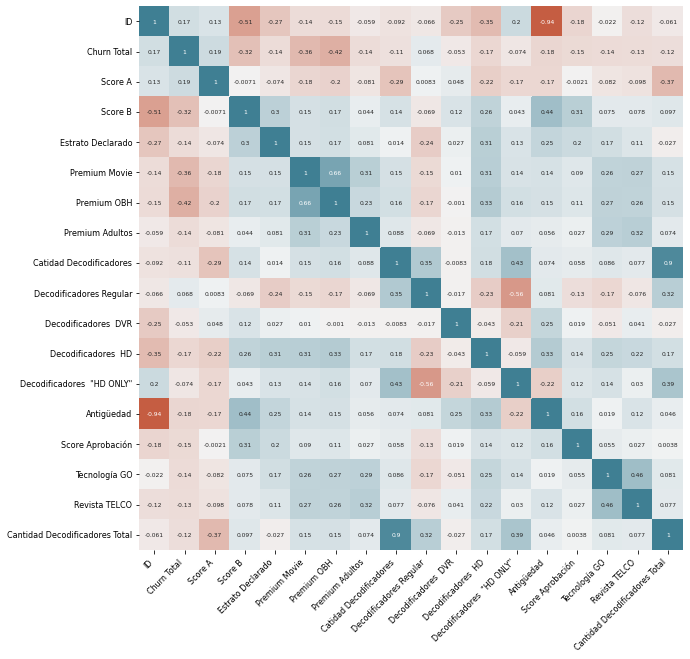

In [33]:
# ==============================================================================


def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matrix de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return (corr_mat)

print("Correlacion:") 
corr_matrix = df_norm.select_dtypes(include=['float64', 'int']).corr(method='pearson')
print(tidy_corr_matrix(corr_matrix))

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)


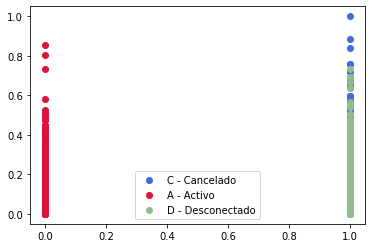

In [20]:

df_norm.rename(columns={'Churn Total':'Churn_Total','Score B':'Score_B', 
                        'Score A':'Score_A', 
                        'Estado Cliente al final del periodo':'Estado_Final'},
          inplace=True)

colors = {"A - Activo":"Crimson", "C - Cancelado":"RoyalBlue", "D - Desconectado":"DarkSeaGreen"}
fig, ax = plt.subplots()
for status in set(df_norm['Estado_Final']):
  ax.scatter(
      df_norm.Churn_Total[df_norm.Estado_Final==status], 
      df_norm.Score_A[df_norm.Estado_Final==status],
      c = colors[status],
      label = status)
plt.legend()
plt.show()

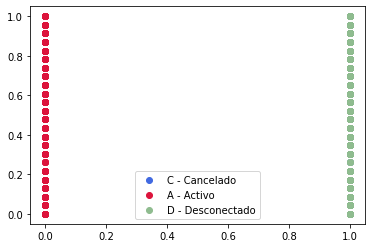

In [19]:
colors = {"A - Activo":"Crimson", "C - Cancelado":"RoyalBlue", "D - Desconectado":"DarkSeaGreen"}
fig, ax = plt.subplots()
for status in set(df_norm['Estado_Final']):
  ax.scatter(
      df_norm.Churn_Total[df_norm.Estado_Final==status], 
      df_norm.Score_B[df_norm.Estado_Final==status],
      c = colors[status],
      label = status)
plt.legend()
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

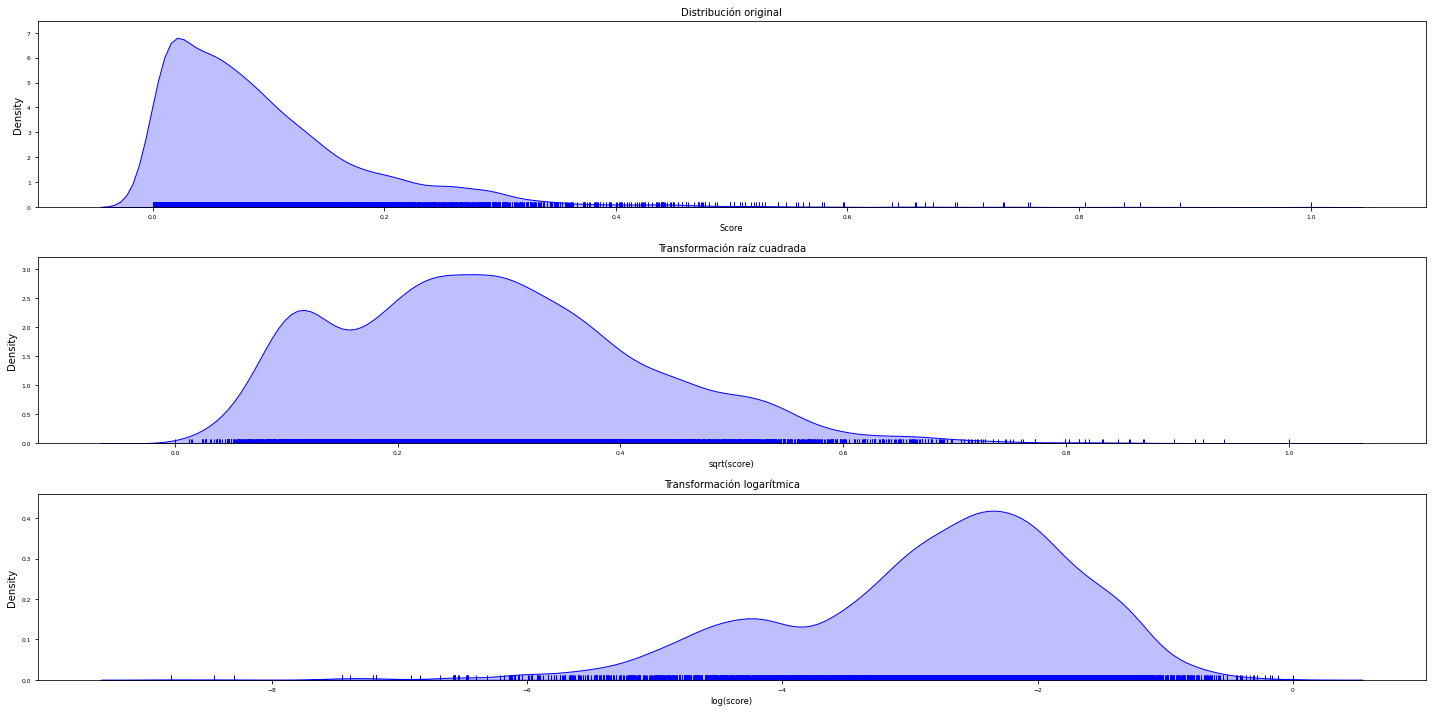

In [21]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))
sns.distplot(
    df_norm['Score_A'],
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Score', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df_norm['Score_A']),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(score)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df_norm['Score_A']),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(score)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2103: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/dis

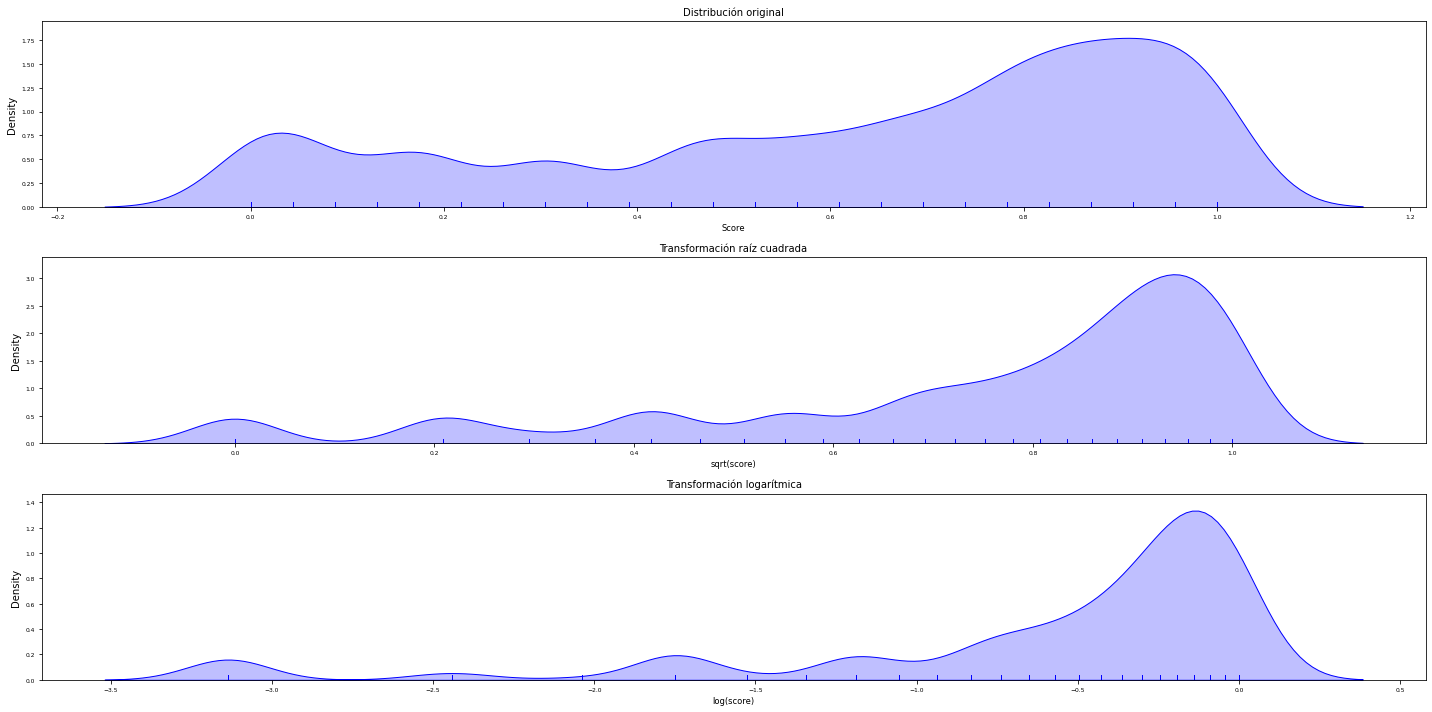

In [22]:
fig, axes = plt.subplots(nrows=3, ncols=1, figsize=(20, 10))
sns.distplot(
    df_norm['Score_B'],
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[0]
)
axes[0].set_title("Distribución original", fontsize = 'medium')
axes[0].set_xlabel('Score', fontsize='small') 
axes[0].tick_params(labelsize = 6)

sns.distplot(
    np.sqrt(df_norm['Score_B']),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[1]
)
axes[1].set_title("Transformación raíz cuadrada", fontsize = 'medium')
axes[1].set_xlabel('sqrt(score)', fontsize='small') 
axes[1].tick_params(labelsize = 6)

sns.distplot(
    np.log(df_norm['Score_B']),
    hist    = False,
    rug     = True,
    color   = "blue",
    kde_kws = {'shade': True, 'linewidth': 1},
    ax      = axes[2]
)
axes[2].set_title("Transformación logarítmica", fontsize = 'medium')
axes[2].set_xlabel('log(score)', fontsize='small') 
axes[2].tick_params(labelsize = 6)

fig.tight_layout()

In [23]:

distribuciones = ['cauchy', 'chi2', 'expon',  'exponpow', 'gamma',
                  'norm', 'powerlaw', 'beta', 'logistic']

fitter = Fitter(df_norm.dropna(subset=["Score_A"]).Score_A, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)
# APARECE EN ORDEN DE LA QUE MAS SE ASEMEJA A LA QUE MENOS

,sumsquare_error,aic,bic,kl_div
beta,15.330063,634.700130,-57996.845564,inf
gamma,15.347722,633.532101,-57995.496640,inf
expon,18.375774,558.842221,-56367.990266,inf
exponpow,27.505128,1234.105687,-52692.924797,inf
chi2,102.895375,402.290755,-40701.441361,inf
logistic,103.422422,1238.052433,-40664.119707,inf
cauchy,104.265328,421.153543,-40590.343379,inf
norm,131.949894,2576.487692,-38450.034992,inf
powerlaw,159.412019,85.978357,-36722.463795,inf


In [24]:
fitter = Fitter(df_norm.dropna(subset=["Score_B"]).Score_B, distributions=distribuciones)
fitter.fit()
fitter.summary(Nbest=10, plot=False)

,sumsquare_error,aic,bic,kl_div
beta,450.178489,57.081838,-30392.978282,inf
powerlaw,484.385362,28.066375,-29680.134336,inf
exponpow,493.185402,74.738381,-29502.629141,inf
cauchy,506.958500,150.096649,-29240.269257,inf
logistic,512.611848,72.154603,-29130.935105,inf
norm,514.406838,56.393093,-29096.472589,inf
gamma,515.839591,58.101910,-29059.854811,inf
chi2,517.545668,56.336813,-29027.301158,inf
expon,542.342802,69.976115,-28575.091083,inf


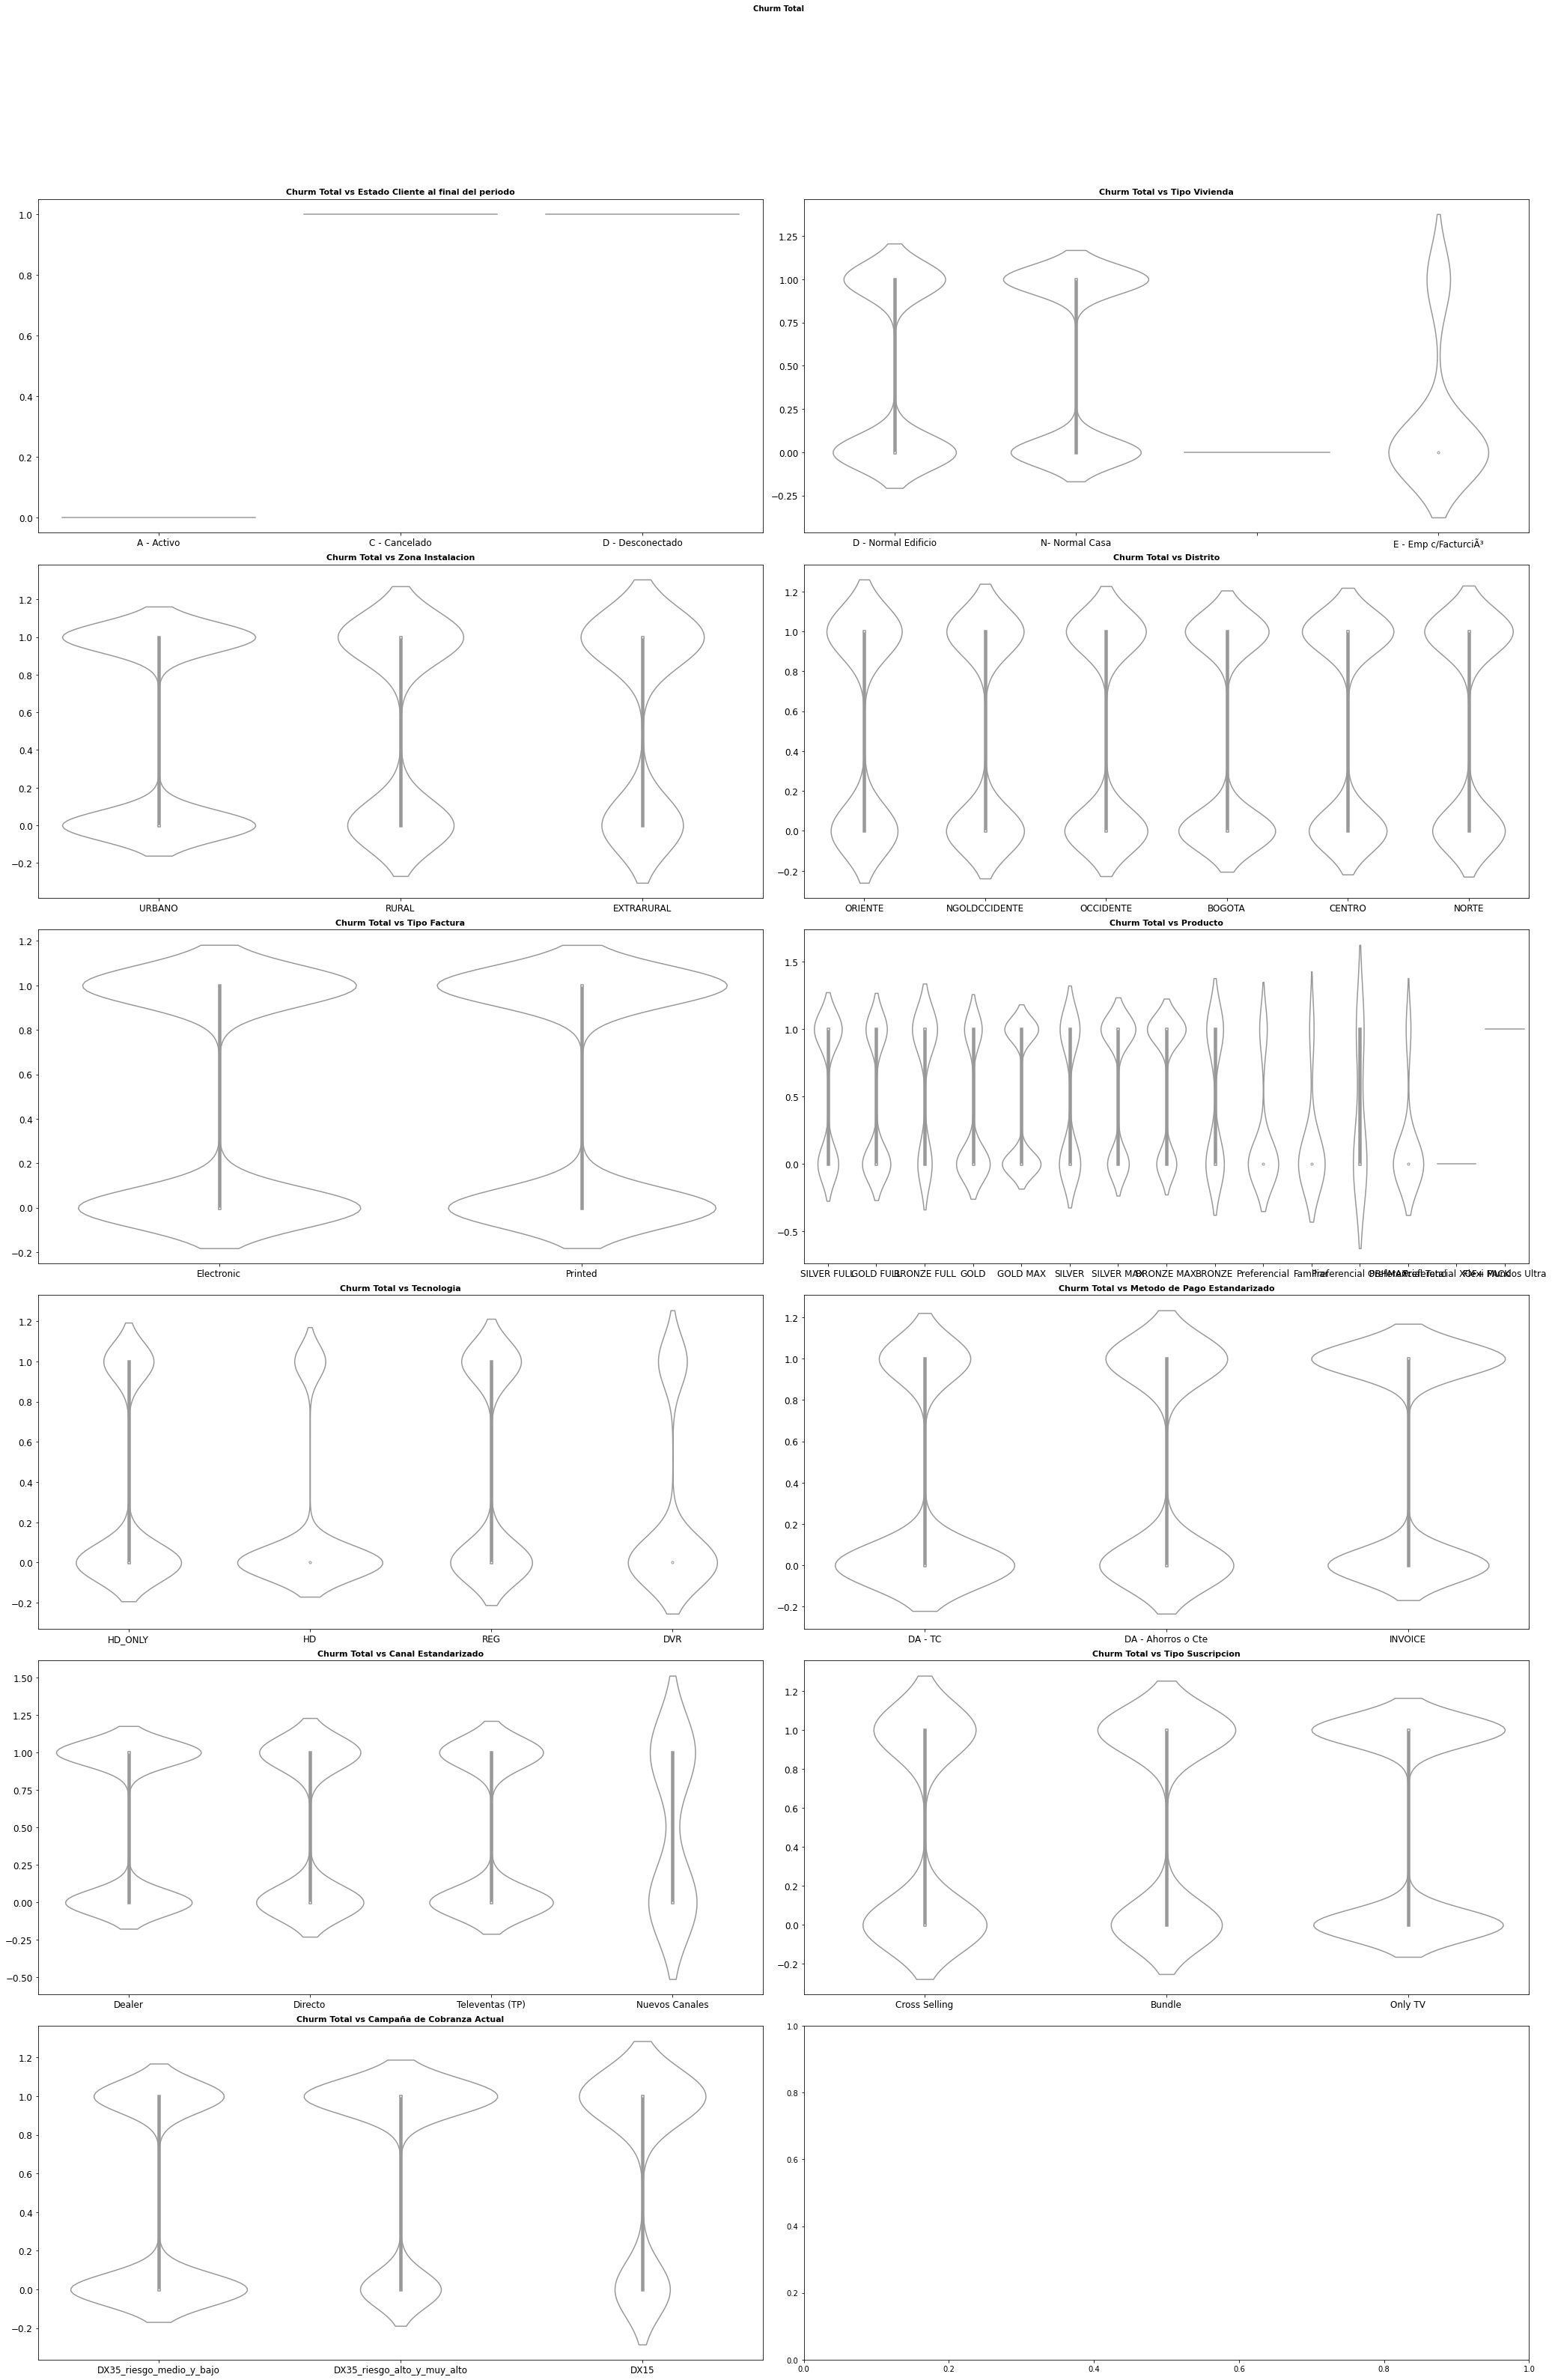

In [45]:
# Gráfico relación entre el precio y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(29, 45))
axes = axes.flat

columnas_object = df_norm.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    sns.violinplot(
        x     = colum,
        y     = "Churn Total",
        data  = df,
        color = "white",
        ax    = axes[i]
    )
    axes[i].set_title(f"Churm Total vs {colum}", fontsize = 11, fontweight = "bold")
    #axes[i].yaxis.set_major_formatter(ticker.EngFormatter())
    axes[i].tick_params(labelsize = 12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Se eliminan los axes vacíos
#for i in [5]:
 #   fig.delaxes(axes[i])
    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Churm Total', fontsize = 10, fontweight = "bold");

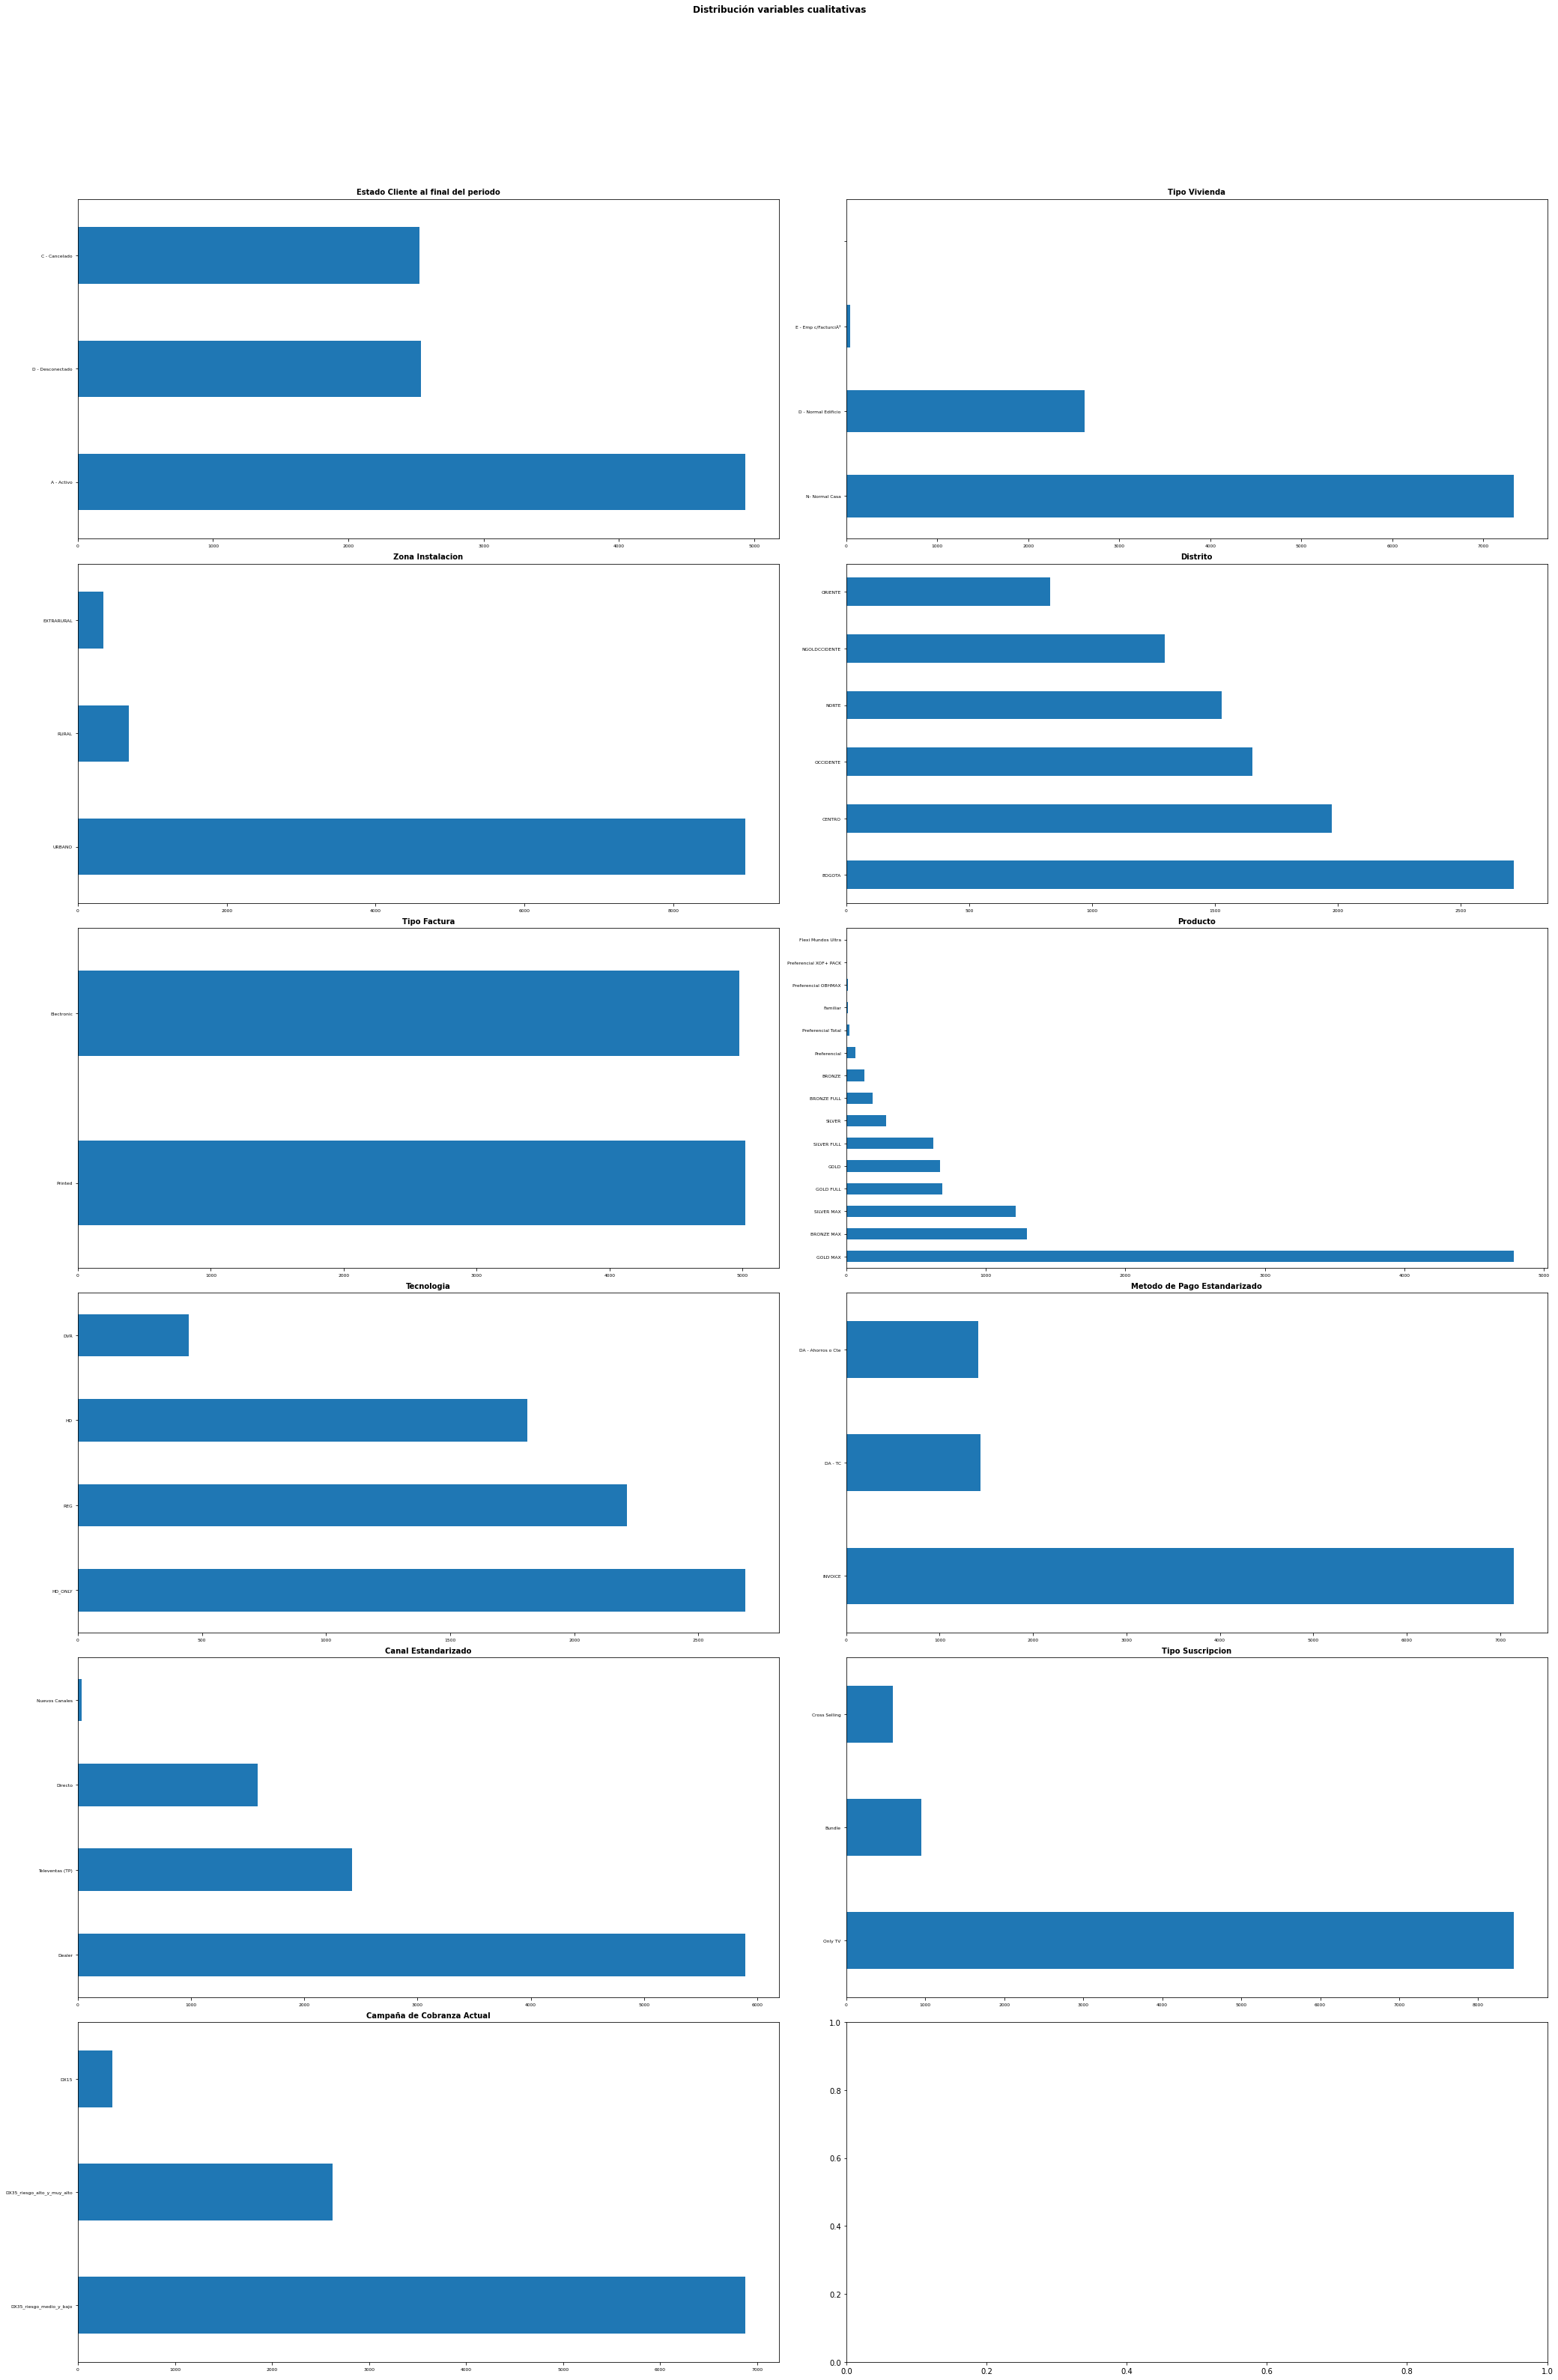

In [41]:
# Gráfico relación entre el Venta pares y cada cada variables cualitativas
# ==============================================================================
# Ajustar número de subplots en función del número de columnas
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(29, 45))
axes = axes.flat
columnas_object = df_norm.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df_norm[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")



    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 12, fontweight = "bold");

In [51]:
from sklearn.preprocessing import OrdinalEncoder
df_norm["Estado Cliente al final del periodo"].value_counts()
# Creamos el codificador indicandole el orden de la variables
encoder = OrdinalEncoder(categories=[["A - Activo", "D - Desconectado", 
                                      "C - Cancelado"]])

# Ajustamos el codificador con la variable education y la transformamos
encoder.fit(df_norm[["Estado Cliente al final del periodo"]])
df_norm["Estado-Encoder"] = encoder.transform(df_norm[["Estado Cliente al final del periodo"]])


,Estado Cliente al final del periodo,Estado-Encoder
4625,A - Activo,0.0
1781,A - Activo,0.0
7435,C - Cancelado,2.0
4543,A - Activo,0.0
2179,A - Activo,0.0
3117,D - Desconectado,1.0
6344,D - Desconectado,1.0
4725,A - Activo,0.0
7957,A - Activo,0.0
3015,C - Cancelado,2.0


In [61]:
df_churn = df_norm[df_norm["Estado-Encoder"]!=0]
df_churn

,ID,Churn Total,Score A,Score B,Estrato Declarado,Premium Movie,Premium OBH,Premium Adultos,Catidad Decodificadores,Decodificadores Regular,Decodificadores DVR,Decodificadores HD,"Decodificadores ""HD ONLY""",Antigüedad,Score Aprobación,Tecnología GO,Revista TELCO,Cantidad Decodificadores Total,Estado Cliente al final del periodo,Tipo Vivienda,Zona Instalacion,Distrito,Tipo Factura,Producto,Tecnologia,Metodo de Pago Estandarizado,Canal Estandarizado,Tipo Suscripcion,Campaña de Cobranza Actual,Estado-Encoder
92,0.999767,1.0,NaN,NaN,0.6,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.741840,0.0,0.0,NaN,C - Cancelado,D - Normal Edificio,URBANO,BOGOTA,Printed,GOLD FULL,NaN,DA - TC,Dealer,Only TV,NaN,2.0
93,0.999951,1.0,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,0.0,0.0,NaN,C - Cancelado,E - Emp c/FacturciÃ³,URBANO,BOGOTA,Printed,GOLD,NaN,INVOICE,Dealer,Only TV,NaN,2.0
94,0.999993,1.0,NaN,NaN,0.8,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.000000,0.000989,0.0,0.0,NaN,C - Cancelado,N- Normal Casa,URBANO,OCCIDENTE,Printed,GOLD FULL,NaN,DA - TC,Directo,Only TV,NaN,2.0
95,0.995929,1.0,NaN,NaN,0.2,0.0,0.0,0.0,0.2,0.4,0.0,0.0,0.0,0.000000,0.385757,0.0,0.0,NaN,D - Desconectado,N- Normal Casa,URBANO,NGOLDCCIDENTE,Printed,SILVER FULL,REG,DA - Ahorros o Cte,Televentas (TP),Only TV,NaN,1.0
96,0.997636,1.0,NaN,NaN,0.8,0.0,0.0,0.0,0.2,0.4,0.0,0.0,0.0,0.000000,0.348170,0.0,0.0,NaN,D - Desconectado,N- Normal Casa,URBANO,NORTE,Printed,SILVER FULL,REG,INVOICE,Dealer,Cross Selling,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,0.863406,1.0,0.000745,0.173913,0.2,0.0,0.0,0.0,0.8,0.0,0.0,0.2,0.8,0.038095,0.411474,0.0,0.0,NaN,D - Desconectado,N- Normal Casa,URBANO,CENTRO,Printed,GOLD MAX,HD,DA - TC,Televentas (TP),Only TV,DX35_riesgo_alto_y_muy_alto,1.0
9986,0.965972,1.0,0.000583,0.608696,0.2,0.0,0.0,0.0,0.8,0.6,0.0,0.0,0.4,0.009524,0.000000,0.0,0.0,NaN,D - Desconectado,N- Normal Casa,RURAL,OCCIDENTE,Printed,GOLD FULL,HD_ONLY,INVOICE,Dealer,Only TV,DX35_riesgo_alto_y_muy_alto,1.0
9987,0.966716,1.0,0.000583,0.043478,0.2,0.0,0.0,0.0,0.8,0.6,0.0,0.0,0.4,0.009524,0.000000,0.0,0.0,NaN,D - Desconectado,N- Normal Casa,RURAL,OCCIDENTE,Printed,GOLD FULL,HD_ONLY,INVOICE,Dealer,Only TV,DX15,1.0
9993,0.952947,1.0,0.000583,0.043478,0.2,0.0,0.0,0.0,0.8,0.8,0.0,0.0,0.2,0.014286,0.538081,0.0,0.0,NaN,D - Desconectado,N- Normal Casa,URBANO,OCCIDENTE,Printed,GOLD FULL,HD_ONLY,INVOICE,Dealer,Only TV,DX35_riesgo_alto_y_muy_alto,1.0


Correlacion:
                         variable_1  ...     abs_r
159                      Antigüedad  ...  0.948540
11                               ID  ...  0.948540
97          Catidad Decodificadores  ...  0.881146
193  Cantidad Decodificadores Total  ...  0.881146
62                    Premium Movie  ...  0.654395
..                              ...  ...       ...
80                      Premium OBH  ...  0.002862
149      Decodificadores  "HD ONLY"  ...  0.002862
148      Decodificadores  "HD ONLY"  ...  0.002862
49                Estrato Declarado  ...  0.000542
87          Catidad Decodificadores  ...  0.000542

[202 rows x 4 columns]


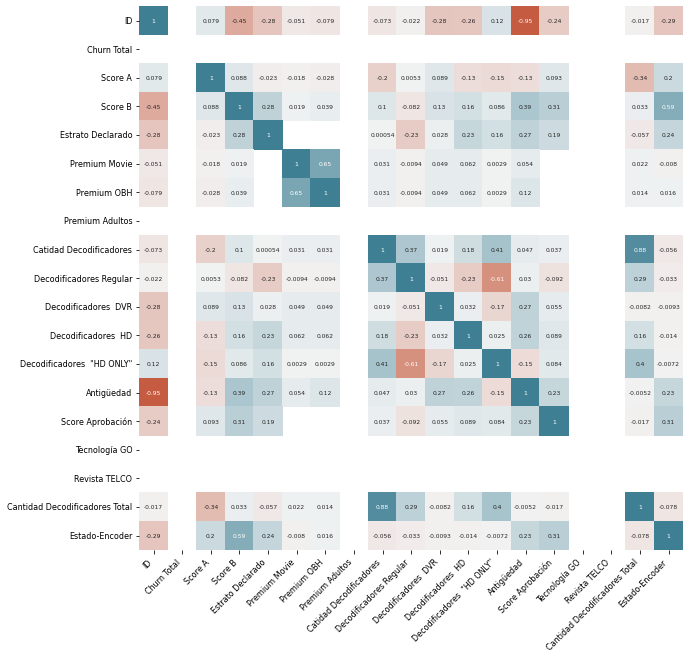

In [62]:
print("Correlacion:") 
corr_matrix = df_churn.select_dtypes(include=['float64', 'int']).corr(method='pearson')
print(tidy_corr_matrix(corr_matrix))

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 6},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 8)

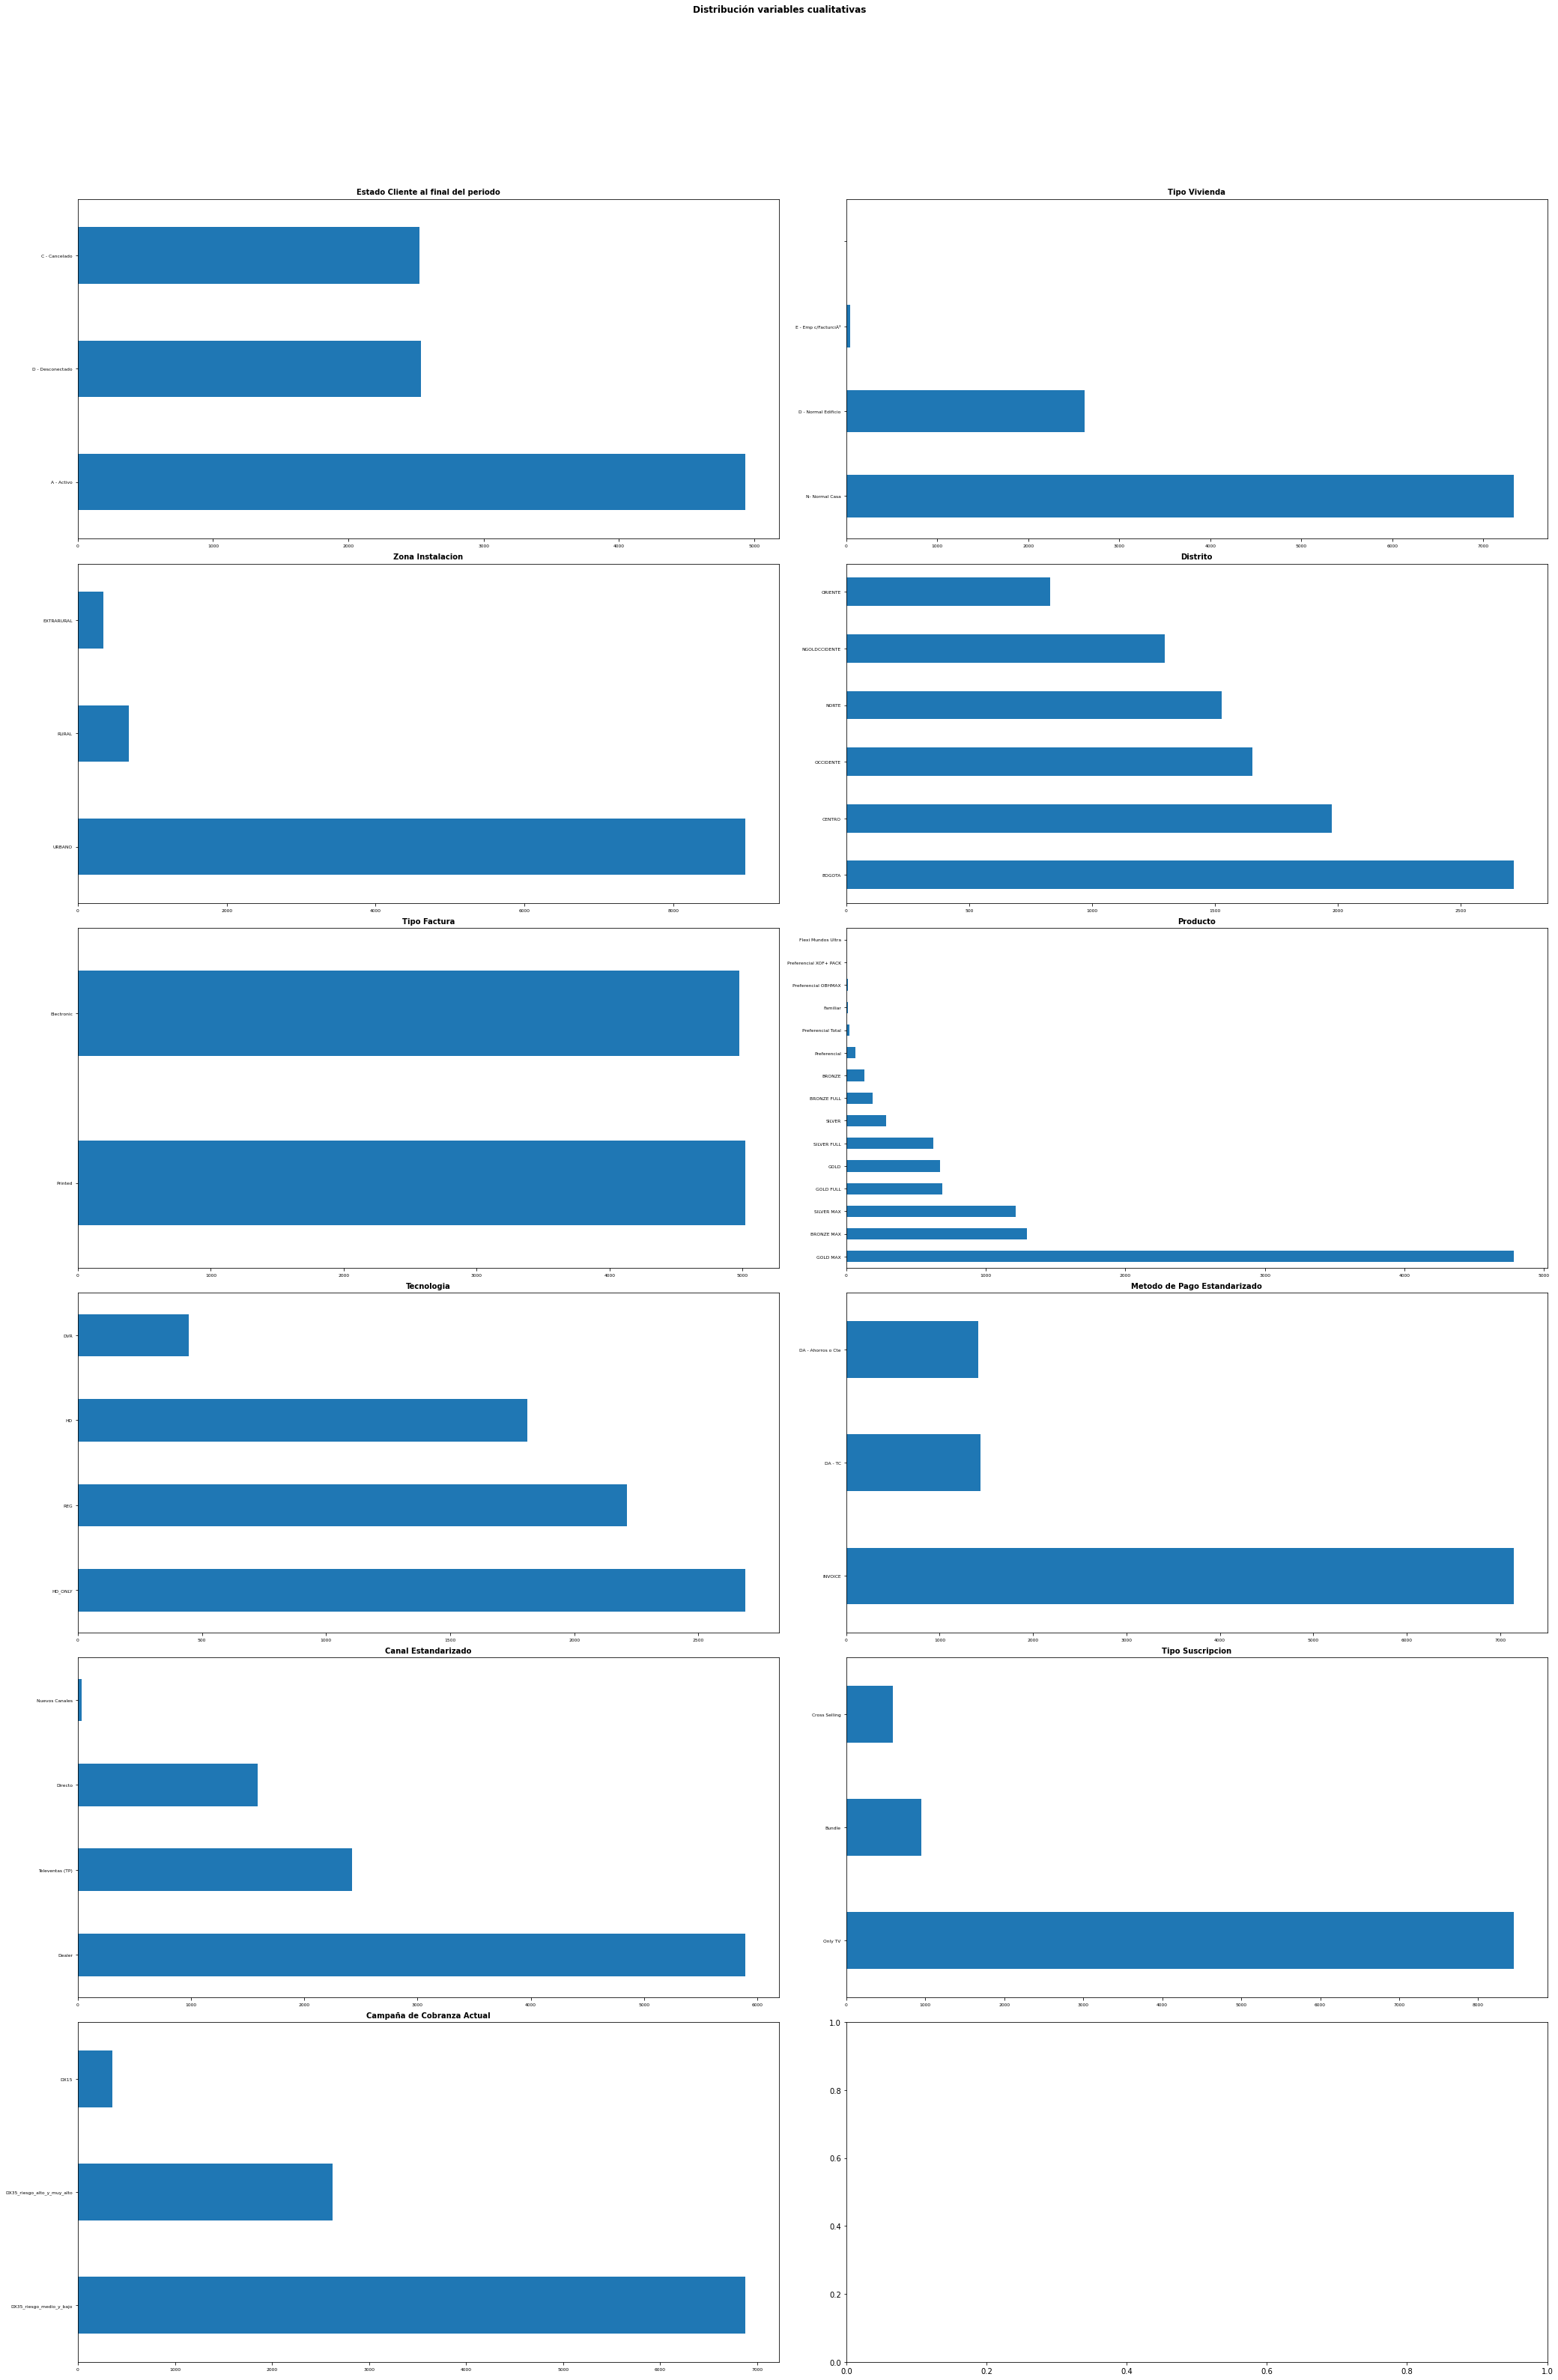

In [64]:
fig, axes = plt.subplots(nrows=6, ncols=2, figsize=(29, 45))
axes = axes.flat
columnas_object = df_churn.select_dtypes(include=['object']).columns

for i, colum in enumerate(columnas_object):
    df_norm[colum].value_counts().plot.barh(ax = axes[i])
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 6)
    axes[i].set_xlabel("")



    
fig.tight_layout()
plt.subplots_adjust(top=0.9)
fig.suptitle('Distribución variables cualitativas',
             fontsize = 12, fontweight = "bold");

### a.	Analizar los scores A y B, haciendo énfasis en su capacidad de predicción y sus propiedades estadísticas más importantes.

A continuación, se podrá evidenciar el análisis de las dos variables, es de considerar que se analizaron las mediadas estadísticas como la media, desviación y cuartiles de la variable original. Pero debido a que no se conoce la magnitud de estas dos se realizó una normalización para equiparar estas medidas y poder hacer un mejor análisis
Score A:  de la Variable original es posible determinar que esta variable tiene valores en el rango entre 0.0005 y 0.1379 con una media de 0.01399 y desviación estándar de 0.01271 . Cuenta con un total de 9089 registros. Ahora bien, en cuanto a la correlación entre las dos variables es significativamente baja con un valor de -0.0072. Con respecto a la distribución de probabilidad, esta tiene un sesgo a la izquierda, y los errores cuadráticos con respecto a las distribuciones de probabilidad más comunas *('cauchy', 'chi2', 'expon',  'exponpow', 'gamma', 'norm', 'powerlaw', 'beta', 'logistic')* es significativamente alto lo que rechaza la hipótesis de similitud con alguna de ellas. Del análisis del grafico de dispersión también es posible ver que pese a que existen con respecto al Churn Total existen 2 grupos los valores de Score son iguales para los dos, significa que no hay una predicción correcta. 

 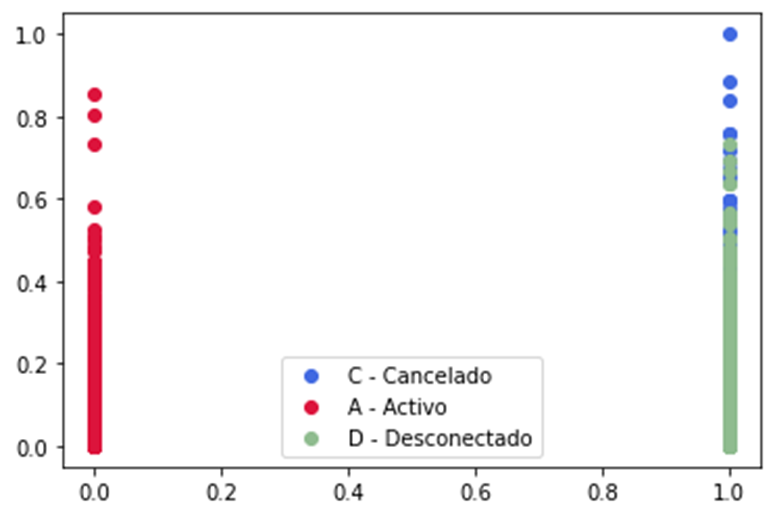

*Gráfica de dispersión Score A (normalizada)*


Score B:  de la Variable original es posible determinar que esta variable tiene valores en el rango entre 1 y 24.0 con una media de 15.36667 y desviación estándar de 7.28563. Cuenta con un total de 9859 registros. Ahora bien en cuanto a la correlación entre las dos variables es significativamente baja con un valor de -0.0072 . Con respecto a la distribución de probabilidad, esta tiene un sesgo a la derecha y los errores cuadráticos con respecto a las distribuciones de probabilidad más comunas *('cauchy', 'chi2', 'expon',  'exponpow', 'gamma', 'norm', 'powerlaw', 'beta', 'logistic')* es significativamente alto lo que rechaza la hipótesis de similitud con alguna de ellas. Del análisis del grafico de dispersión también es posible ver que pese a que existen con respecto al Churn Total existen 2 grupos los valores de Score son iguales para los dos, significa que no hay una predicción correcta.

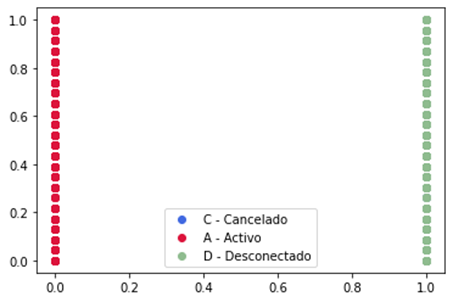

*Gráfica de dispersión Score B (normalizada)*




###b.	¿Cuál de los 2 score tiene un mejor poder de predicción? ¿Por qué?

Hablando de mejor poder predictivo podemos analizar la correlación entre Churn Total y las medidas de Score, entre estas variables hay una mayor correlación con Score A, pese que es significativamente baja con un valor de 0.19, con una significancia de su débil correlación. además con respecto al grafico de dispersión es posible detallar que hay una mejor aproximación a la predicción con el Estado Cliente al final del periodo, pese a no ser marcada. 



###c.	¿Además de los scores cuales son las 3 variables que considera más importantes a la hora de definir un cliente CHURN?

En primer lugar, a considerar las variables cualitativas que muestran datos relevantes en consideración al Churn Total y de acuerdo al grafico mostrado serian:
* Producto
* Tecnología
* Tipo Suscripcion
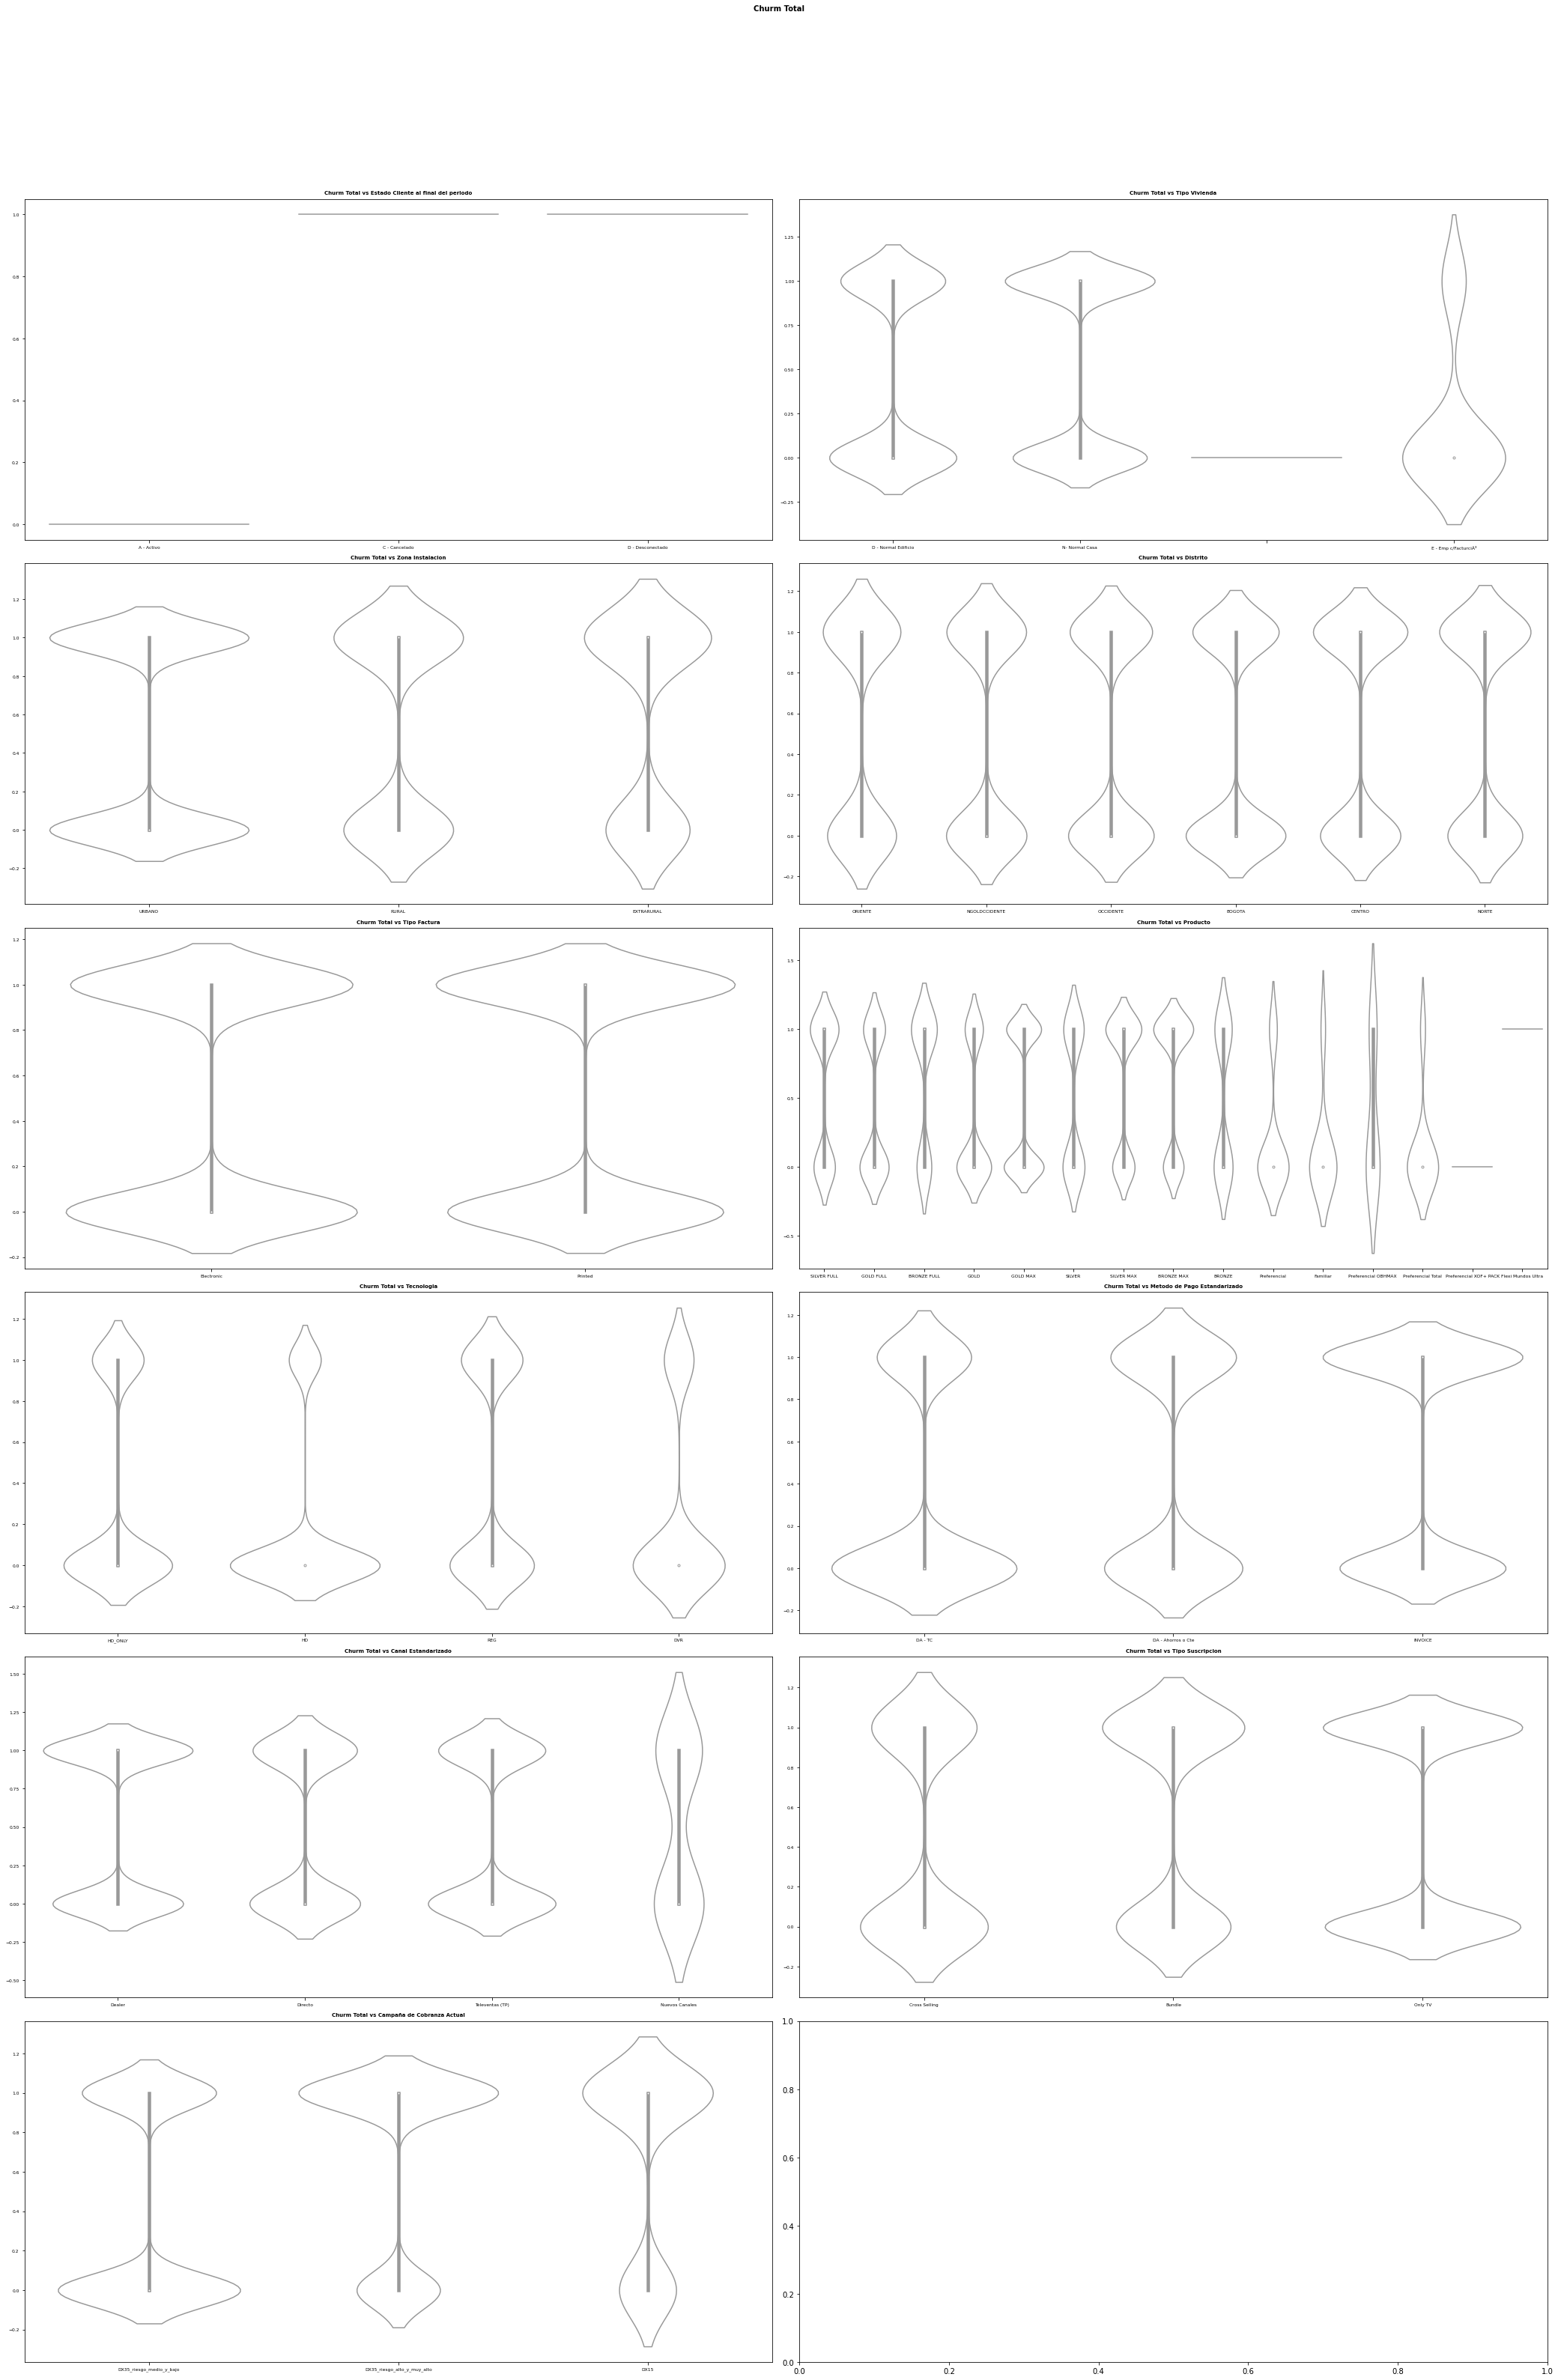

Con respecto a las variables cuantitativas se determinarían de acuerdo a la correlación con el Chur Total, con respecto a este las variables deben tener una correlación significativa, pese a no ser tan alta, por consiguiente, se considerarían las siguientes variables:
* Antiguaedad
* Codoficadores Regulares
* Decodificaror DVR


### d.	Proponga desde los resultados del análisis una estrategia de gestión del churn para el cliente.

•	Según el análisis dado, y la relación existente entre el Churn y las demás variables se recomienda tener una campaña de mejoramiento en la variable de Tecnología, puesto que se evidencia que dependiendo el tipo de esta hay una correlación significativa entre con perder al cliente, además de esta un cambio en la compaña de cobranza también podría ayudar a conserva mas clientes teniendo en cuenta que las que se encuentran en riesgo medio bajo son las que tiene una tasa más alta de permanencia. 

### e.	¿Qué variables propondría para ayudar a entender los eventos de Cancelación (CHURN VOLUNTARIO) y Desconexión (CHURN INVOLUNTARIO)?

•	Teniendo en cuenta que la variable a considerar es el churn y las características propias de este tipo de compañía prestadora de servicios de cable, puede medirse el numero de fallas presentadas hasta la fecha, así como también una campaña de retención de clientes de acuerdo a la antigüedad del mismo, serian las dos principales recomendaciones dadas a este cliente 

###f.	¿Cuáles variables adicionales considera que podrían medirse en futuros análisis para entender el fenómeno de CHURN?

Según el análisis de la variable fue posible determinar que las variables cuantitativas vistas en hace referencia a el estado declarado, puesto que su relación crea la hipótesis que tiene una incidencia significativa en el Churn, en segundo lugar se encuentra el Score de aprobación y la antigüedad del usuario. 

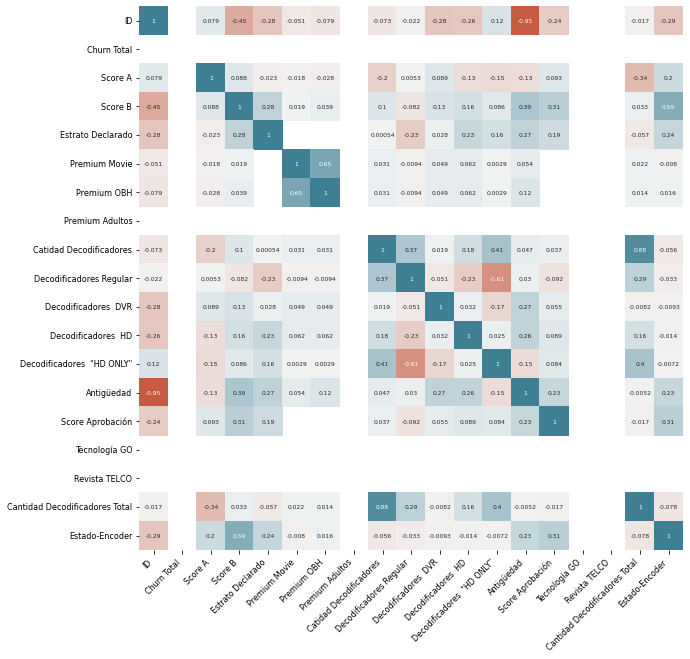

•	Teniendo en cuenta que la variable a considerar es el churn y las características propias de este tipo de compañía prestadora de servicios de cable, puede medirse el numero de fallas presentadas hasta la fecha, así como también una campaña de retención de clientes de acuerdo a la antigüedad del mismo, serian las dos principales recomendaciones dadas a este cliente 